In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Data Handlation

In [135]:
df = pd.read_csv('data/iris-data.csv')
df = df.dropna()
df['class'].replace(["Iris-setosa", "Iris-versicolor"], [1, 0], inplace=True)
X = df.iloc[:, :-1].values
Y = df.iloc[:, 4].values

scalar = StandardScaler()
X = scalar.fit_transform(X)
X = np.append(X,np.ones((X.shape[0],1)),axis=1)
# Y = Y.reshape((Y.shape[0],1))
print(X.shape,Y.shape)
Y

(95, 5) (95,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Model, Loss Function, Optimizer

In [136]:
def model(X,W):
    return 1/(1+np.exp(-np.dot(X,W)))

In [137]:
def loss_bce(Y,Y_):
    return -np.sum(Y*np.log(Y_)+(1-Y)*np.log(1-Y_))/Y.shape[0]

In [138]:
def fit(X,Y,epoch=10,batch_size=32,lr=0.01):
    W = np.zeros(X.shape[1])
    for e in range(epoch):
        total_loss = 0
        #No Batch Gradient Descent
        # Y_ = model(X,W)
        # loss = loss_bce(Y,Y_)
        # print("Epoch: ",e+1," Loss: ",loss)
        # for i in range(W.shape[0]):
        #     dw = np.sum((Y_ - Y)*X[:,i])/Y.shape[0]
        #     W[i] = W[i] - lr*dw

        #Batch Gradient Descent
        Y_PRED = []
        for i in range(0,X.shape[0],batch_size):
            X_BATCH = X[i:i+batch_size,:]
            Y_BATCH = Y[i:i+batch_size]
            Y_PRED_BATCH = model(X_BATCH,W)
            Y_PRED.append(Y_PRED_BATCH)
            loss = loss_bce(Y_BATCH,Y_PRED_BATCH)
            total_loss += loss
            # print("Epoch: ",e+1," Loss: ",loss)

            for j in range(W.shape[0]):
                dw = np.dot((Y_PRED_BATCH - Y_BATCH),X_BATCH[:,j])
                W[j] = W[j] - lr*dw

        avg_loss = total_loss/X.shape[0]
        print("Epoch: ",e+1," Loss: ",avg_loss)
        Y_PRED = np.concatenate(Y_PRED,axis=0)
        # print(Y.shape,Y_PRED.shape)
        plt.plot(X,Y_PRED,label='epoch: '+str(e+1))
        plt.legend()
        plt.show()

    plt.plot(X,Y,label='Dataset')
    plt.legend()
    plt.show()

    return W

## Test

Epoch:  1  Loss:  0.021416644668514433


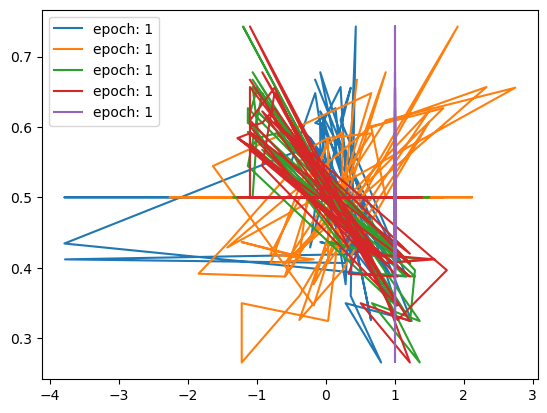

Epoch:  2  Loss:  0.01266559608979463


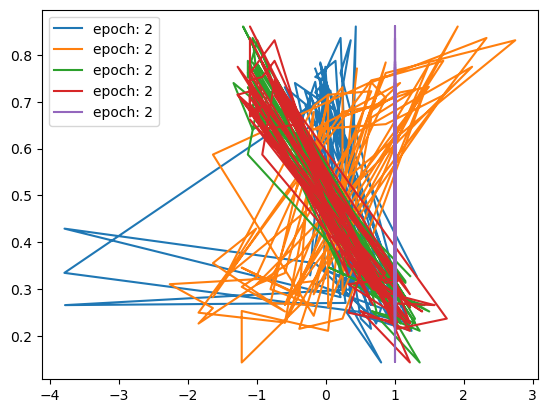

Epoch:  3  Loss:  0.00888861382872004


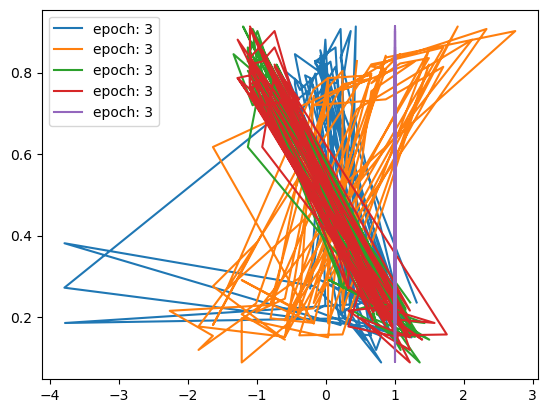

Epoch:  4  Loss:  0.006859429023091121


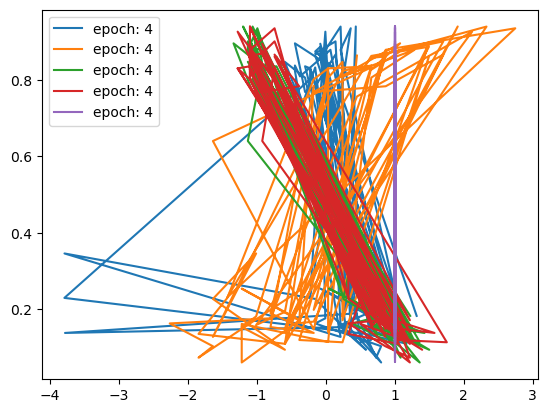

Epoch:  5  Loss:  0.0056016710592571555


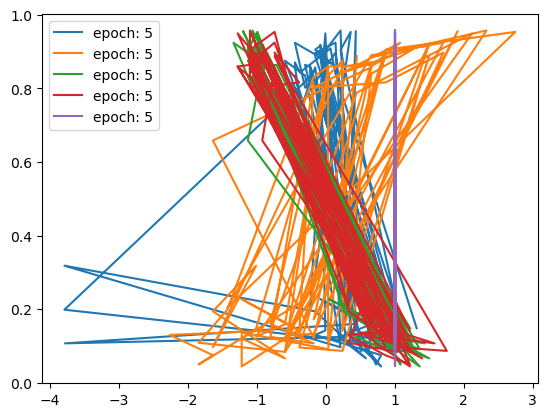

Epoch:  6  Loss:  0.004746734052496778


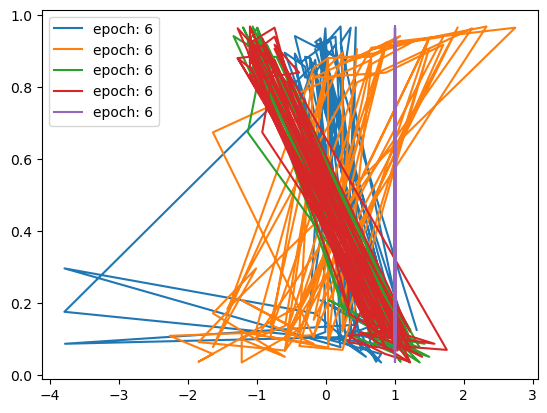

Epoch:  7  Loss:  0.004127630917852489


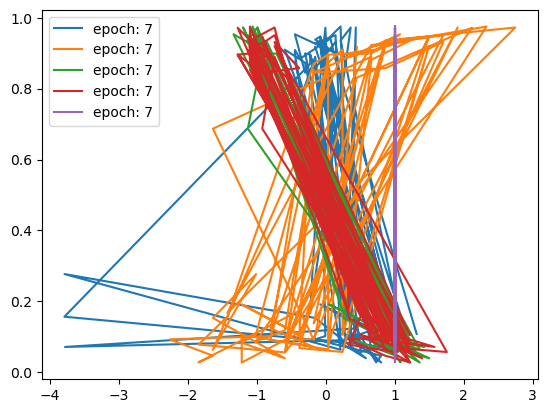

Epoch:  8  Loss:  0.003658265011939911


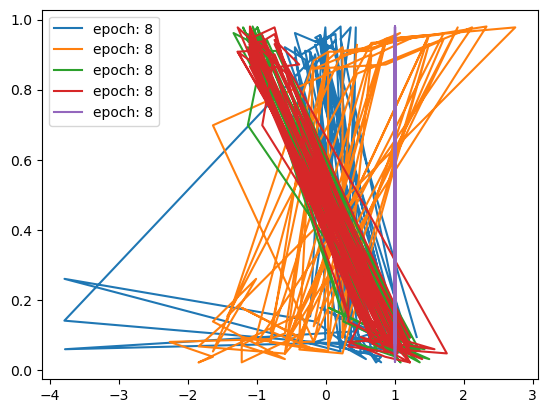

Epoch:  9  Loss:  0.003289866384300412


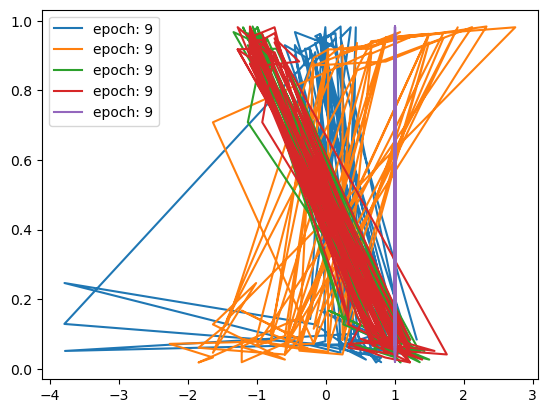

Epoch:  10  Loss:  0.00299277502965907


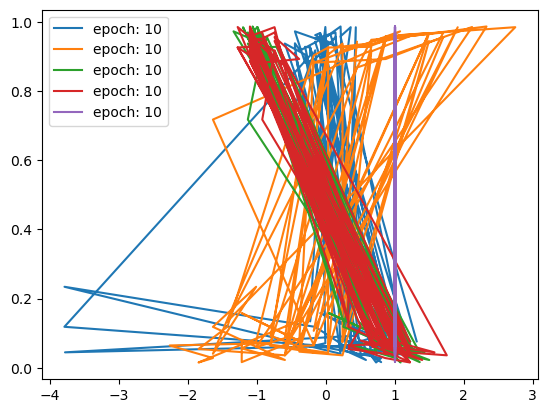

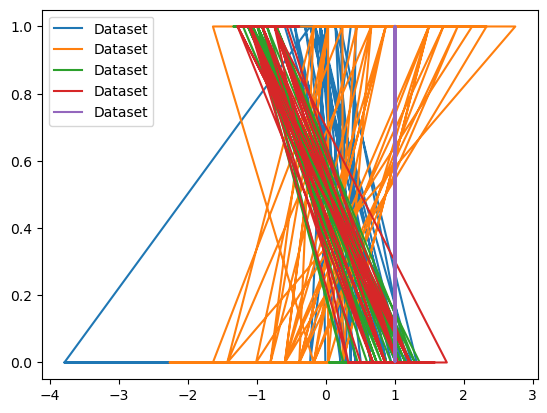

In [139]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,Y,test_size=0.2,random_state=0)
W = fit(X_TRAIN,Y_TRAIN,epoch=10,batch_size=32,lr=0.01)